# K-Nearest Neighbors

The nearest neighbors algorithm is part of a family of algorithms that are known as lazy learners. These types of learners do not
build a model, which means they do not really do any learning.
Instead, they simply refer to the training data during the prediction
phase in order to assign labels to unlabeled data. Lazy learners are
also referred to as instance-based learners or rote learners due to 
their heavy reliance on the training set. Despite the simplicity of
lazy learners, such as the k-nearest neighbors approach, they are
powerful in dealing with difficult-to-understand data that have a
large number of features with a large number of instances of fairly
similar class. 

The k-nearest neighbors method is premised on the basic idea that things that are similar
are likely to have properties that are similar. Therefore, to assign a class to new data,
we first find k instances of existing data that are as similar as possible (nearest neighbors)
to the new data. Then, we use the labels of those nearest neighbors to predict the
label of the new data.

## Dataset Heart Desease

As we explore the nearest neighbors algorithm in this chapter, we will use a dataset
containing information about patients with and without heart disease. This dataset was
initially gathered for use by researchers at four medical institutions in the United States,
Switzerland, and Hungary and is made available to the data science community through
the University of California at Irvine’s Machine Learning Repository

The dataset includes a variety of medical data for our analysis:
- $age$ is the age, in years, of the patient.
- $sex$ is the biological sex of the patient.
- $painType$ describes the type of chest pain, if any, reported by the patient. The
options for this variable are: Typical angina, Atypical angina, Nonanginal pain, and  Asymptomatic (no pain).
- $restingBP$ is the patient’s systolic blood pressure at rest, measured in millimeters
of mercury.
- $cholesterol$ is the patient’s total cholesterol, measured in milligrams per liter.
- $highBloodSugar$ is a logical value indicating whether the patient has a fasting
blood sugar reading greater than 120 milligrams per deciliter.
- $restingECG$ is a categorical variable providing an interpretation of the patient’s
resting electrocardiographic results. The possible values are: Normal, Hypertrophy, WaveAbnormality.
- $exerciseAngina$ is a logical value indicating whether the patient experiences
exercise-induced angina.
- $STdepression$ is a numeric evaluation of the patient’s degree of ST depression,
an electrocardiogram finding related to heart disease.
- $STslope$ is a categorical value describing the slope of the patient’s ST segment on
an electrocardiogram. It may have these values: Downsloping, Flat, Upsloping.
- $coloredVessels$ is the number of major vessels that appear colored when subjected
to fluoroscopy. This value ranges from 0 to 3.
- $defectType$ is a categorical value describing a defect identified in the patient’s
heart. It may have these values: Normal, ReversibleDefect, FixedDefect.
- $heartDisease$ is the variable we are trying to predict. It is a logical value that is
TRUE if the patient suffers from heart disease and FALSE if he or she does not.


## k-Nearest Neighbors
The k-nearest neighbors method is premised on the basic idea that things that are similar
are likely to have properties that are similar. Therefore, to assign a class to new data,
we first find k instances of existing data that are as similar as possible (nearest neighbors)
to the new data. Then, we use the labels of those nearest neighbors to predict the
label of the new data.

To illustrate how k-NN works, let’s attempt to deal with the problem we introduced
in the previous section. Our goal is to use the existing set of patient records to predict
whether a new patient is likely to suffer from heart disease or not. To keep things simple,
let’s limit our analysis to only two of the predictor variables in our dataset: age and cholesterol. Our class variable is heartDisease.

Now, consider a hypothetical 45-year-old new patient with a cholesterol level of 225.
Based on their cholesterol level and age alone, how could we determine whether they
suffer from heart disease or not? Using the k-nearest neighbors approach, the first thing
we do is find the k most similar patients to our new patient in our dataset. These are the
nearest neighbors to our new patient. Then, we assign the label of the most common
class among the neighbors to our new patient. To illustrate this approach, we add a new
data point to our previous scatterplot that represents the new patient.

![title](images/ima1.png)

If k is set to 1, we identify the one existing data point that is closest to our new data
point. By visual inspection, we can see that this is either patient 11 or patient 9. Let’s
assume that it is patient 9. This patient does not suffer from heart disease. Therefore, we
will classify our new patient as also not suffering from heart disease. However, if k were
set to 3, the three nearest neighbors to our new patient are patients 9, 11, and 5. Since
the most common class among these three patients is TRUE for heart disease, then we
would classify our new patient as suffering from heart disease as well.

To quantify the distance between two points, the k-nearest neighbors
algorithm uses a distance function that works for data with more than two dimensions.
This measure is known as Euclidean distance.

Euclidean distance is the straight-line distance between the coordinates of two points
in multidimensional space. Mathematically, we define the Euclidean distance between
two points p and q as follows:

$$ dist(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + .... + (p_n - q_n)^2}$$


## References:


-- Practical Machine Learning in R, First Edition. Fred Nwanganga and Mike Chapple.

## Pros
-  Very simple.
- Training is trivial.
- Works with any number of classes.
- Easy to add more data.
- Few parametres: K, distance mretic.

## Cons
- High prediction cost
- Not good for high dimensional data.
- Categorical Feature don't work well.


# Practical example with R

In [2]:
#install.packages("caTools")
library("ISLR")
library("caTools")
library("dplyr")
library("class") # knn
library("ggplot2")
options(repr.plot.width = 16, repr.plot.height = 6)

In [10]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [143]:
summary(Caravan$Purchase)

No  Yes 
5474  348

In [144]:
# check NA values
any(is.na(Caravan))

[1] FALSE

In [145]:
x <- Caravan %>% select(-Purchase)
y <- Caravan %>% select(Purchase)

> Standarization

In [146]:
# standarization
x.standarized  <- scale(x)

> Train test split

In [147]:
set.seed(123)
split <- sample.split(y, SplitRatio=0.6)

In [148]:
# 
x_train <- subset(x.standarized, split=TRUE)
x_test <- subset(x.standarized, split=FALSE)
# target
y_train <- subset(y, split=TRUE) %>% pull()
y_test <- subset(y, split=FALSE) %>% pull()


> knn() function

arguments:

- train	: matrix or data frame of training set cases.

- test : matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case.

- cl : factor of true classifications of training set.
    
- k	: number of neighbours considered.

In [149]:
y_pred <- knn(train=x_train, test= x_test, cl=y_train, k=3)


In [150]:
x_test_pred <- data.frame(x_test,'Purchase'= y_test, 'Purchase.pred'= y_pred)
head(x_test_pred)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase,Purchase.pred
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,0.68084775,-0.2725565,0.4066617,-1.21685949,0.7793384,-0.6942510,0.2174254,-0.06870474,-0.1618019,0.42763309,...,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No,No
2,0.99221162,-0.2725565,-0.8594262,-1.21685949,0.7793384,0.3025256,-0.3653787,-0.06870474,0.4641188,-0.09606902,...,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No,No
3,0.99221162,-0.2725565,-0.8594262,-1.21685949,0.7793384,-0.6942510,-0.3653787,0.91409379,0.4641188,-1.66717535,...,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No,No
4,-1.18733547,-0.2725565,0.4066617,0.01075374,-0.9708962,1.2993023,-0.9481828,0.91409379,0.4641188,-0.61977113,...,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No,No
5,1.22573452,-0.2725565,1.6727497,-1.21685949,1.4794323,0.3025256,-0.3653787,-0.06870474,0.4641188,0.42763309,...,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No,No
6,-0.09756193,-0.2725565,-0.8594262,-2.44447272,-0.2708024,-0.6942510,0.2174254,-1.05150327,1.0900394,-3.23828168,...,-0.08104764,-0.05991487,-1.014271,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063,No,No


In [151]:
# precision of the model
precision <- mean(x_test_pred$Purchase == x_test_pred$Purchase.pred)
precision 

[1] 0.9467537

> Selecting the best k value

In [152]:
precision <- numeric()
k = 2:20
for(i in 1:length(k)){
    y_pred_i <- knn(train=x_train, test= x_test, cl=y_train, k=i)
    precision[i] <- mean(y_test == y_pred_i)
    #cat(paste0('k = ', i, ', precision = ', precision[i], '\n'))
}

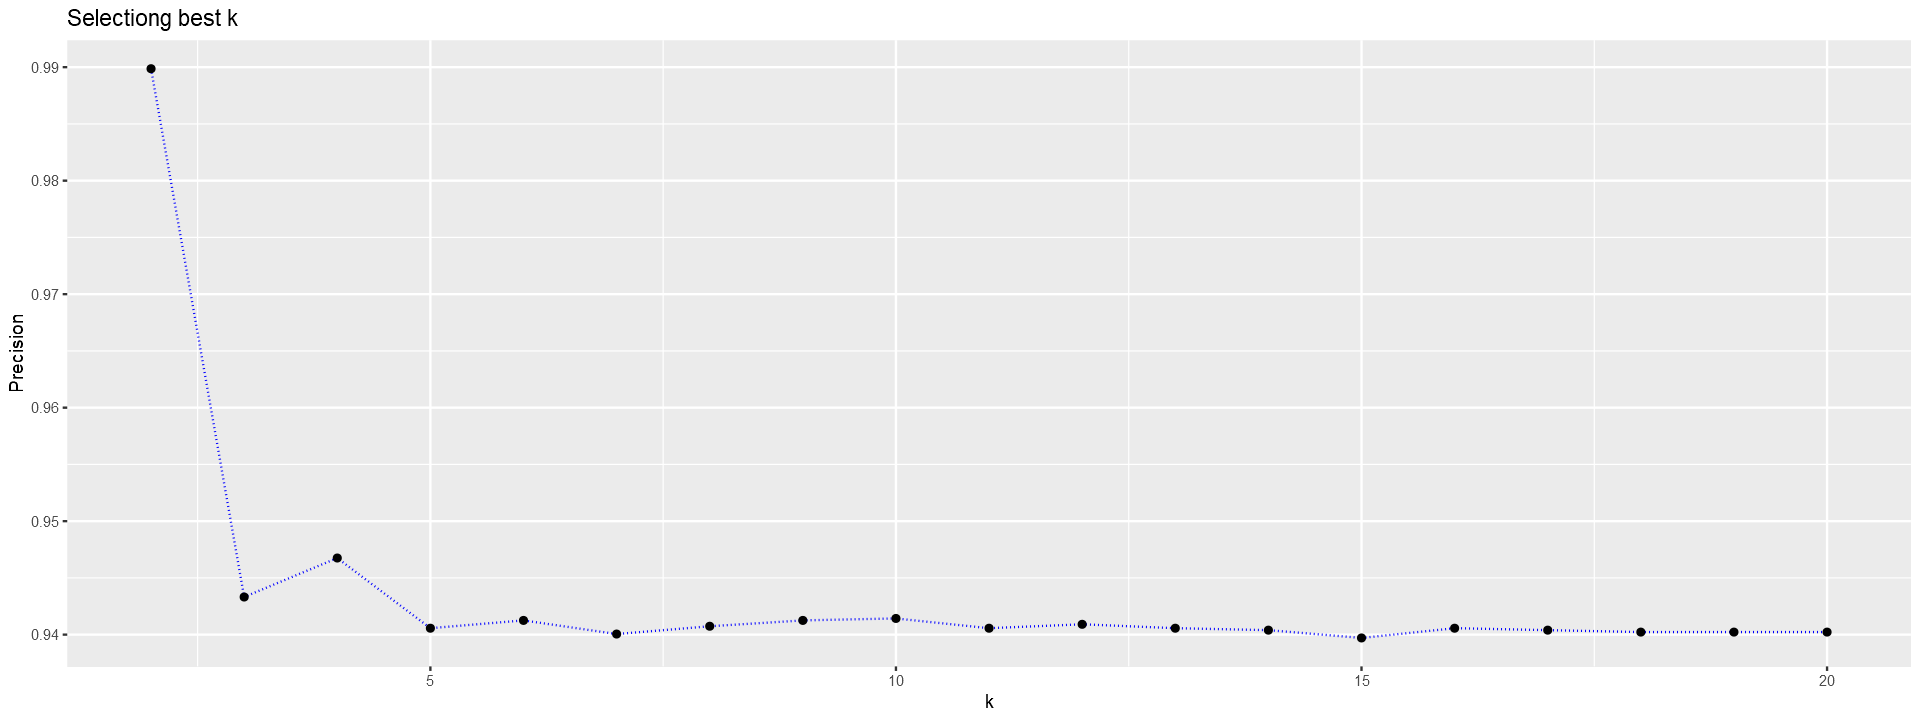

In [153]:
# make dataframe
df_k  <- data.frame('k'= k, 'precision'= precision)

# plot
p1 <- ggplot(df_k, aes(x=k, y=precision)) +
geom_line(lty='dotted', color='blue') +
geom_point(col='black') +
labs(x='k', y='Precision', title='Selectiong best k')
p1


> Conclusions:

When we observe the above plot, we can see clearly that the best choise of $k$ is when the line of the precision is flat, so this happend whe $k=4$

## k fold cross validation

In [4]:
#install.packages("caret")
library("caret")

In [5]:

df <- Caravan
head(Caravan)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
6,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,No


In [6]:
x <- df %>% select(-Purchase)
y <- df %>% select(Purchase)

In [7]:
# standarization
x.standarized  <- scale(x)

In [8]:
set.seed(123)
split <- sample.split(y, SplitRatio=0.8)

In [9]:
# train
x_train <- subset(x.standarized, split=TRUE)
x_test <- subset(x.standarized, split=FALSE)
# target
y_train <- subset(y, split=TRUE) %>% pull()
y_test <- subset(y, split=FALSE) %>% pull()

In [10]:
folds <- createFolds(y_train, k = 10)
names(folds)

[1] "Fold01" "Fold02" "Fold03" "Fold04" "Fold05" "Fold06" "Fold07" "Fold08"
 [9] "Fold09" "Fold10"

In [14]:
# loop
precision <- numeric()
for(i in 1:length(folds)){
    fold_i <- folds[[i]]
    # train
    x_train_fold <- x_train[-fold_i,]
    y_train_fold <- y_train[-fold_i]
    # test
    x_validation_fold <- x_train[fold_i,]
    y_validation_fold <- y_train[fold_i]
    #
    y_pred_fold <- knn(train=x_train_fold, test= x_validation_fold, cl=y_train_fold, k=10)
    #cm <- table(y_test_fold, y_pred_fold)
    #precision[i] <- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] +cm[1,2] + cm[2,1])
    precision[i] <- mean(y_validation_fold == y_pred_fold)
}

In [15]:
# 
precision2 <- mean(round(precision,4))
precision2

[1] 0.93955

# Easy way

In [140]:
df <- Caravan
head(Caravan)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
6,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,No


In [166]:
set.seed(12345)
split <- sample.split(df$Purchase, SplitRatio=0.7)

In [172]:
# train and test
train <- subset(df, split=TRUE)
test <- subset(df, split=FALSE)

In [168]:
set.seed(400)
ctrl <- trainControl(method="repeatedcv", repeats = 3) #,classProbs=TRUE,summaryFunction = twoClassSummary)
knnFit <- train(Purchase ~ ., data = train, method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)

# Output of kNN fit
knnFit

k-Nearest Neighbors 

5822 samples
  85 predictor
   2 classes: 'No', 'Yes' 

Pre-processing: centered (85), scaled (85) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 5240, 5240, 5239, 5240, 5240, 5240, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa       
   5  0.9347887   0.032917215
   7  0.9382796   0.022994581
   9  0.9394251   0.013024030
  11  0.9397691   0.008784034
  13  0.9398836   0.002613169
  15  0.9401698  -0.000111739
  17  0.9402271   0.000000000
  19  0.9402271   0.000000000
  21  0.9402271   0.000000000
  23  0.9402271   0.000000000
  25  0.9402271   0.000000000
  27  0.9402271   0.000000000
  29  0.9402271   0.000000000
  31  0.9402271   0.000000000
  33  0.9402271   0.000000000
  35  0.9402271   0.000000000
  37  0.9402271   0.000000000
  39  0.9402271   0.000000000
  41  0.9402271   0.000000000
  43  0.9402271   0.000000000

Accuracy was used to select the optimal model using the largest value.
The fin

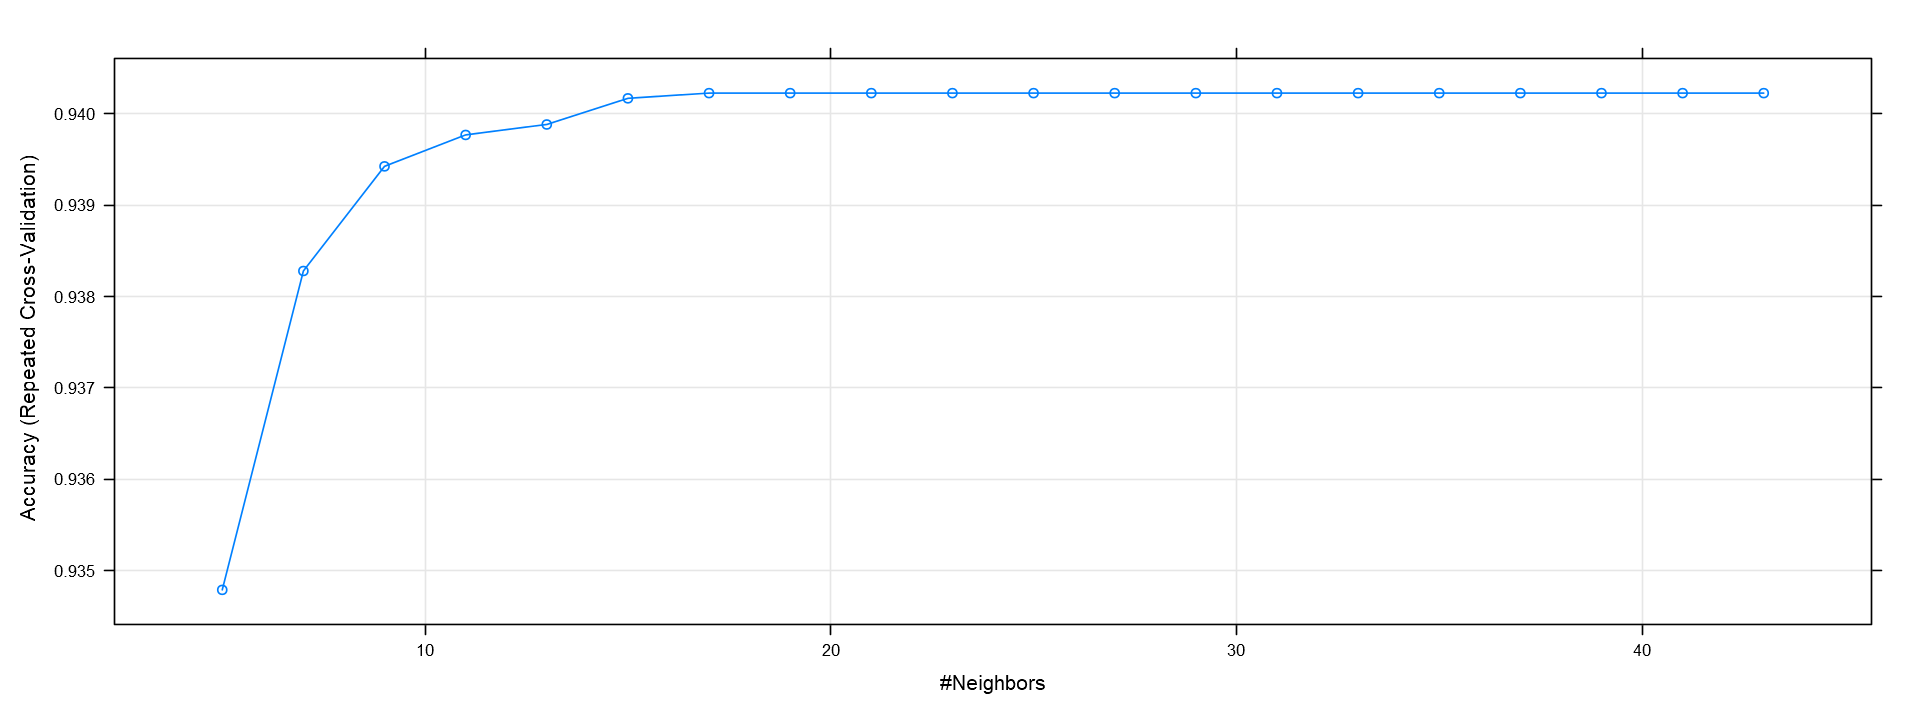

In [169]:
plot(knnFit)

In [170]:
knnPredict <- predict(knnFit, newdata = test)
# Get the confusion matrix to see accuracy value and other parameter values
confusionMatrix(knnPredict, test$Purchase)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  5474  348
       Yes    0    0
                                          
               Accuracy : 0.9402          
                 95% CI : (0.9338, 0.9462)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.5143          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.9402          
         Neg Pred Value :    NaN          
             Prevalence : 0.9402          
         Detection Rate : 0.9402          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : No              
                        